# BM 336546 - HW2: Type 1 Diabetes (also known as juvenile diabetes)
T1D is a chronic condition resulting from a lack of insulin in the body. The disease typically presents in early childhood or adolescence. Up to 0.33% of the global population suffers from T1D, making it a world-wide and wide-spread issue. There is no cure and the current treatment is to control blood glucose levels through glucose monitoring, insulin injections, diet, and lifestyle modifications to prevent complications.
The exact cause of T1D is a mystery; however, there are few possible causes such as genetics, autoimmune dysfunction or environmental factors such as some kind of viruses.
Credit: https://www.mayoclinic.org/diseases-conditions/type-1-diabetes/symptoms-causes/syc-20353011


# Assignment
This assignment has no prebuilt notebook. You are required to build and present an appropriate notebook to show your experiments and results. Please provide all answers within the notebook (in a markdown cell), labeled carefully based on the question number. In this assignment, you will do the following:
Explore the data provided.
Implement linear and non-linear classifiers.
Model optimization with k-fold cross validation
Evaluate your model performances with appropriate metrics.
Present a 2d visualization of multi-featured data.
Use feature selection tools.
Use the provided HW2 environment and any additional packages you need for this assignment.

# Theory Questions

1) In most cases model performances is more importent then model accuracy. when our dataset is imbalance (A very common case, and also the case for the T1D data set) the accurcy measure can give us misleading result. for example when our dataset contains mainly poistive cases. a 'naive' model (wich prediect alwayes yes) can get reltivey good accurcay result even though it is useless.
  

2) training a model with less feature has some significant benefits: first 1D, 2D and 3D data can be Visualize while data with more dimension can't. secondly more feature demand more sample to avoid overfitting. in addition with large data set computing time becomes importent factor. The downside is possible worse accurcy and performances. more features is more data, some features can have unpredicted correltion with the label, and so can improve the model performances significantly.

3)....

4)..

# Coding Assignment

# sec 1
first we start by loading the data 

In [2]:
import pandas as pd 
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# sec 1 - load data 
file = Path.cwd().joinpath('HW2_data.csv')
T1D_dataset = pd.read_csv(file) 
T1D_dataset.head() 

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
0,45,Male,No,No,No,Yes,No,No,No,Yes,No,No,Yes,No,Yes,No,Negative,0
1,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Negative,0
2,45,Male,Yes,Yes,No,Yes,No,Yes,No,No,No,Yes,No,No,Yes,No,Positive,0
3,59,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Positive,1
4,40,Female,Yes,Yes,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,No,No,Positive,0


Secondly we will start with basic analysis and processing of the Data
<br>
Given the binary nature of the Data and the low number of nan we decided to drop every row with 'nan' in one of the features


In [4]:
# sec 1 - Data preprocessing  
T1D_dataset_clean = T1D_dataset.dropna()
# print(len(T1D_dataset_clean.index))
# print(len(T1D_dataset.index))
lost_sampels = len(T1D_dataset.index)-len(T1D_dataset_clean.index)
lost_sampels
# number of lost sampel is relatively low

42

for this section we decided not to do anymore preprocessing. in sec 3 and 4, there is further processing of the data to support the visualizeation and training stages. All this is done after train-test split

# sec 2
In this section we split our data into train and test 

In [5]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Sec 2

Diagnosis = T1D_dataset_clean.loc[:,'Diagnosis']
T1D_dataset_clean_no_label = T1D_dataset_clean.drop(['Diagnosis'],axis=1)
T1D_dataset_clean_no_label.head()
X_train, X_test, Y_train, Y_test = train_test_split(T1D_dataset_clean_no_label, np.ravel(Diagnosis), test_size=0.2,
                                                        random_state=0, stratify=np.ravel(Diagnosis))
X_train

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Family History
406,40,Female,Yes,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,Yes,No,No,0
199,68,Male,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,No,Yes,No,No,No,1
85,38,Male,Yes,Yes,No,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,0
312,40,Male,Yes,No,No,No,No,Yes,No,Yes,No,Yes,No,No,Yes,No,0
166,59,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,57,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,No,No,No,0
270,38,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
190,60,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,Yes,Yes,No,No,0
223,38,Male,Yes,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,1


# sec 3

a) analysis of the distribution of the features between test and train
bin_to_num transform our Binary data into 1/0 numeric data wich support test/train analysis implementaion

In [6]:
from DataExplorer import bin_to_num
from DataExplorer import test_train_comparison

comparison_data = test_train_comparison(bin_to_num(X_train), bin_to_num(X_test))
comparison_data

,train %,test %
Gender,63,62
Increased Urination,50,49
Increased Thirst,45,41
Sudden Weight Loss,41,44
Weakness,58,59
Increased Hunger,46,45
Genital Thrush,23,20
Visual Blurring,45,43
Itching,49,46
Irritability,25,21


a.1 .....

a.2 .....

b. relationship between feature and label

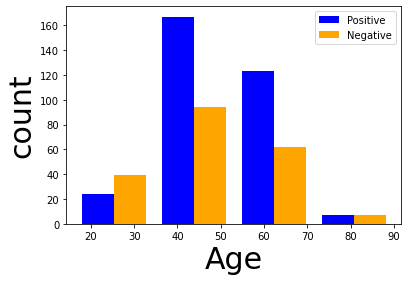

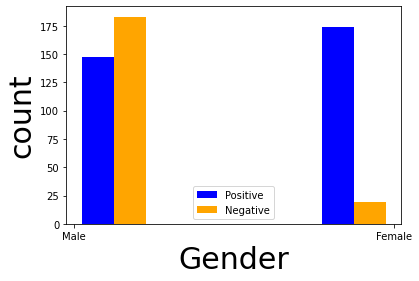

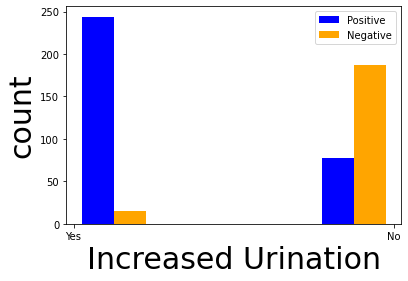

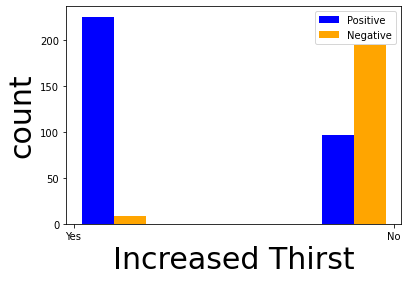

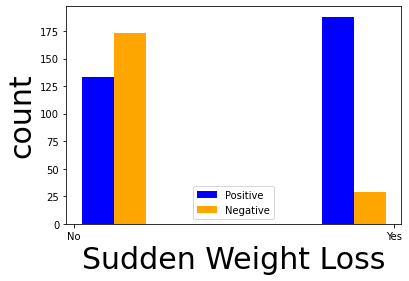

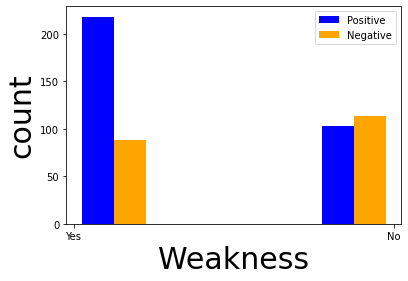

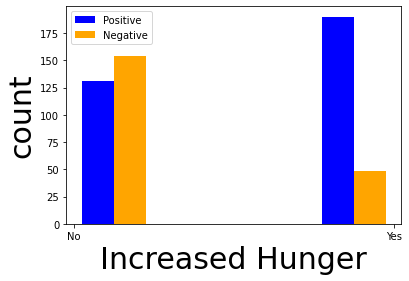

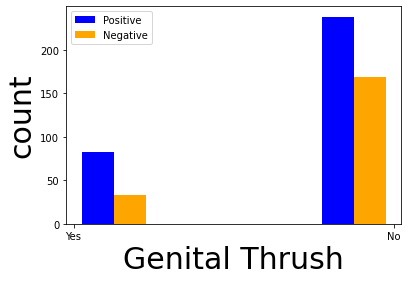

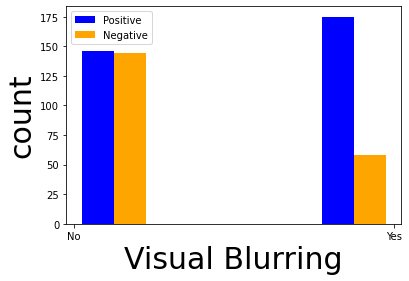

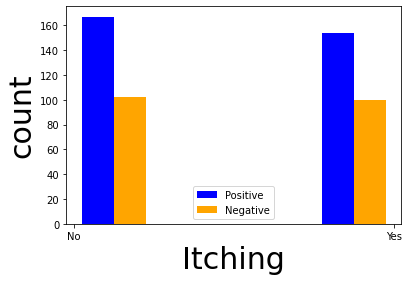

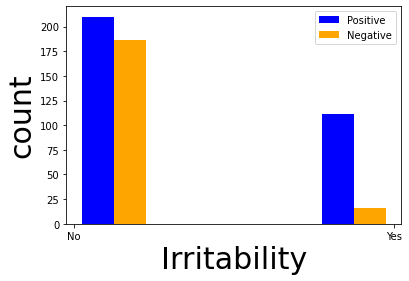

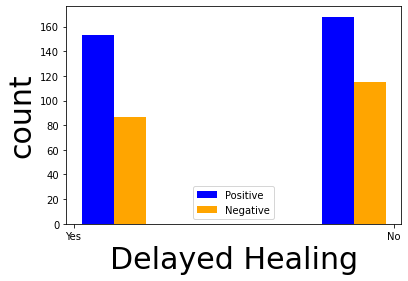

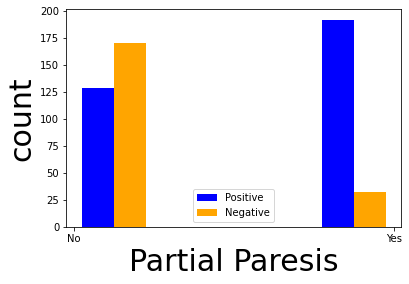

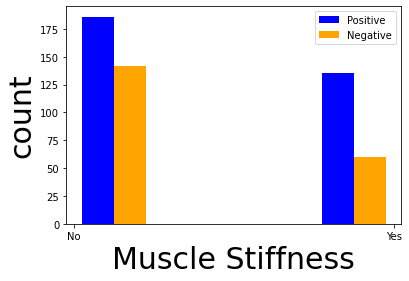

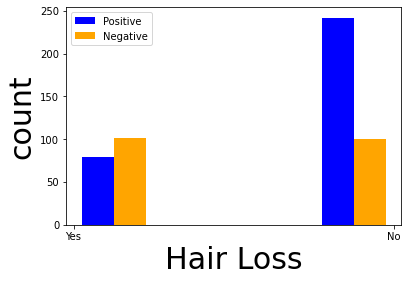

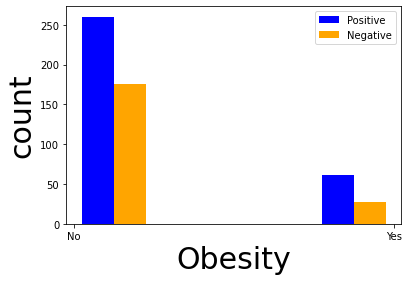

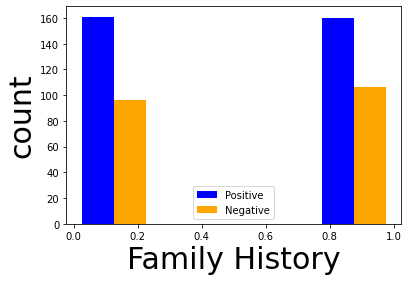

In [7]:
from DataExplorer import data_explorer
data_explorer(T1D_dataset_clean)

c. additional plots

In [6]:
import seaborn as sns
#sns.pairplot(T1D_dataset_clean_bin.loc[:,'Delayed Healing':'Diagnosis'], hue="Diagnosis");

d...

# sec 4

In this sec we encoded our data as one hot vectors. instead of using sklearn function. we implement our on version which keep the titles of the columns and give a more understandable result.
In addition our function skip the 'Age' feature since this is a non-categorical feature and not suitable for one-hot encoding

In [8]:
from DataExplorer import encode_and_bind
one_hot_data = encode_and_bind(T1D_dataset_clean)
one_hot_data.head()

,Age,Gender_Female,Gender_Male,Increased Urination_No,Increased Urination_Yes,Increased Thirst_No,Increased Thirst_Yes,Sudden Weight Loss_No,Sudden Weight Loss_Yes,Weakness_No,...,Muscle Stiffness_No,Muscle Stiffness_Yes,Hair Loss_No,Hair Loss_Yes,Obesity_No,Obesity_Yes,Diagnosis_Negative,Diagnosis_Positive,Family History_0,Family History_1
0,45,0,1,1,0,1,0,1,0,0,...,1,0,0,1,1,0,1,0,1,0
1,42,0,1,1,0,1,0,1,0,1,...,1,0,0,1,1,0,1,0,1,0
2,45,0,1,0,1,0,1,1,0,0,...,1,0,0,1,1,0,0,1,1,0
3,59,1,0,1,0,1,0,1,0,1,...,1,0,1,0,1,0,0,1,0,1
4,40,1,0,0,1,0,1,0,1,0,...,0,1,1,0,1,0,0,1,1,0


We used our function only on the X_train and X_test. for the Y we transform it to numric (1/0), but did not encode it as one-hot vector, Because 
we have come to the conclusion that it produces unnecessary duplication of data  

In [10]:
X_train = encode_and_bind(X_train) 
X_test = encode_and_bind(X_test)
X_test

,Age,Gender_Female,Gender_Male,Increased Urination_No,Increased Urination_Yes,Increased Thirst_No,Increased Thirst_Yes,Sudden Weight Loss_No,Sudden Weight Loss_Yes,Weakness_No,...,Partial Paresis_No,Partial Paresis_Yes,Muscle Stiffness_No,Muscle Stiffness_Yes,Hair Loss_No,Hair Loss_Yes,Obesity_No,Obesity_Yes,Family History_0,Family History_1
504,48,0,1,0,1,0,1,0,1,1,...,1,0,1,0,1,0,1,0,0,1
146,48,1,0,0,1,0,1,0,1,0,...,0,1,1,0,1,0,1,0,1,0
218,58,1,0,0,1,1,0,0,1,1,...,1,0,0,1,1,0,0,1,0,1
476,39,1,0,0,1,0,1,1,0,1,...,0,1,0,1,1,0,1,0,1,0
286,43,1,0,0,1,0,1,0,1,0,...,0,1,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,53,0,1,0,1,0,1,0,1,0,...,0,1,1,0,0,1,1,0,0,1
501,37,0,1,1,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
43,55,1,0,0,1,0,1,0,1,0,...,0,1,1,0,1,0,0,1,0,1
464,53,0,1,1,0,1,0,1,0,0,...,0,1,0,1,0,1,1,0,0,1


In [11]:
Y_train[Y_train=='Positive']=1
Y_train[Y_train=='Negative']=0
Y_test[Y_test=='Positive']=1
Y_test[Y_test=='Negative']=0
Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')

# sec 5

5.a.1 Logistic Regression with k fold cross validation

1.scaling to age in x test/age
2.try y with hot encoding 

In [12]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

max_iter = 2000
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
log_reg = LogisticRegression(random_state=5, max_iter=max_iter,solver='lbfgs')
lmbda = np.array([0.01, 0.01, 1, 10, 100, 1000])
pipe = Pipeline(steps=[('logistic', log_reg)])
clf = GridSearchCV(estimator=pipe, param_grid={'logistic__C': 1/lmbda, 'logistic__penalty': ['l2', 'none']},
                   scoring=['accuracy','f1','precision','recall','roc_auc'], cv=skf,
                   refit='roc_auc', verbose=3, return_train_score=True)
clf.fit(X_train, Y_train)
print(clf.best_params_)
best_log_reg = clf.best_estimator_

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] logistic__C=100.0, logistic__penalty=l2 .........................
[CV]  logistic__C=100.0, logistic__penalty=l2, accuracy=(train=0.936, test=0.976), f1=(train=0.948, test=0.980), precision=(train=0.952, test=1.000), recall=(train=0.944, test=0.962), roc_auc=(train=0.985, test=0.998), total=   0.0s
[CV] logistic__C=100.0, logistic__penalty=l2 .........................
[CV]  logistic__C=100.0, logistic__penalty=l2, accuracy=(train=0.949, test=0.905), f1=(train=0.958, test=0.926), precision=(train=0.969, test=0.893), recall=(train=0.948, test=0.962), roc_auc=(train=0.986, test=0.983), total=   0.0s
[CV] logistic__C=100.0, logistic__penalty=l2 .........................
[CV]  logistic__C=100.0, logistic__penalty=l2, accuracy=(train=0.957, test=0.905), f1=(train=0.965, test=0.920), precision=(train=0.965, test=0.958), recall=(train=0.965, test=0.885), roc_auc=(train=0.992, test=0.935), total=   0.0s
[CV] logistic__C=100.0, l

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  logistic__C=100.0, logistic__penalty=l2, accuracy=(train=0.947, test=0.905), f1=(train=0.956, test=0.917), precision=(train=0.965, test=1.000), recall=(train=0.948, test=0.846), roc_auc=(train=0.987, test=0.962), total=   0.0s
[CV] logistic__C=100.0, logistic__penalty=l2 .........................
[CV]  logistic__C=100.0, logistic__penalty=l2, accuracy=(train=0.949, test=0.952), f1=(train=0.959, test=0.963), precision=(train=0.961, test=0.929), recall=(train=0.957, test=1.000), roc_auc=(train=0.986, test=1.000), total=   0.0s
[CV] logistic__C=100.0, logistic__penalty=l2 .........................
[CV]  logistic__C=100.0, logistic__penalty=l2, accuracy=(train=0.955, test=0.929), f1=(train=0.963, test=0.941), precision=(train=0.978, test=0.923), recall=(train=0.948, test=0.960), roc_auc=(train=0.988, test=0.960), total=   0.1s
[CV] logistic__C=100.0, logistic__penalty=l2 .........................
[CV]  logistic__C=100.0, logistic__penalty=l2, accuracy=(train=0.939, test=0.976), f1=(t

C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn

[CV]  logistic__C=100.0, logistic__penalty=none, accuracy=(train=0.949, test=0.905), f1=(train=0.958, test=0.926), precision=(train=0.969, test=0.893), recall=(train=0.948, test=0.962), roc_auc=(train=0.986, test=0.983), total=   0.0s
[CV] logistic__C=100.0, logistic__penalty=none .......................
[CV]  logistic__C=100.0, logistic__penalty=none, accuracy=(train=0.957, test=0.905), f1=(train=0.965, test=0.920), precision=(train=0.965, test=0.958), recall=(train=0.965, test=0.885), roc_auc=(train=0.992, test=0.935), total=   0.0s
[CV] logistic__C=100.0, logistic__penalty=none .......................
[CV]  logistic__C=100.0, logistic__penalty=none, accuracy=(train=0.947, test=0.929), f1=(train=0.957, test=0.941), precision=(train=0.957, test=0.960), recall=(train=0.957, test=0.923), roc_auc=(train=0.986, test=0.995), total=   0.0s
[CV] logistic__C=100.0, logistic__penalty=none .......................
[CV]  logistic__C=100.0, logistic__penalty=none, accuracy=(train=0.949, test=0.881

C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "



[CV] logistic__C=100.0, logistic__penalty=none .......................
[CV]  logistic__C=100.0, logistic__penalty=none, accuracy=(train=0.955, test=0.929), f1=(train=0.963, test=0.941), precision=(train=0.978, test=0.923), recall=(train=0.948, test=0.960), roc_auc=(train=0.988, test=0.960), total=   0.0s
[CV] logistic__C=100.0, logistic__penalty=none .......................
[CV]  logistic__C=100.0, logistic__penalty=none, accuracy=(train=0.939, test=0.976), f1=(train=0.950, test=0.980), precision=(train=0.952, test=0.962), recall=(train=0.948, test=1.000), roc_auc=(train=0.985, test=1.000), total=   0.0s
[CV] logistic__C=100.0, logistic__penalty=none .......................
[CV]  logistic__C=100.0, logistic__penalty=none, accuracy=(train=0.955, test=0.951), f1=(train=0.963, test=0.960), precision=(train=0.978, test=0.960), recall=(train=0.948, test=0.960), roc_auc=(train=0.985, test=0.990), total=   0.0s
[CV] logistic__C=100.0, logistic__penalty=l2 .........................
[CV]  logi

C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn

[CV]  logistic__C=100.0, logistic__penalty=none, accuracy=(train=0.947, test=0.929), f1=(train=0.957, test=0.941), precision=(train=0.957, test=0.960), recall=(train=0.957, test=0.923), roc_auc=(train=0.986, test=0.995), total=   0.0s
[CV] logistic__C=100.0, logistic__penalty=none .......................
[CV]  logistic__C=100.0, logistic__penalty=none, accuracy=(train=0.949, test=0.881), f1=(train=0.959, test=0.902), precision=(train=0.961, test=0.920), recall=(train=0.957, test=0.885), roc_auc=(train=0.990, test=0.935), total=   0.0s
[CV] logistic__C=100.0, logistic__penalty=none .......................
[CV]  logistic__C=100.0, logistic__penalty=none, accuracy=(train=0.947, test=0.905), f1=(train=0.956, test=0.917), precision=(train=0.965, test=1.000), recall=(train=0.948, test=0.846), roc_auc=(train=0.987, test=0.962), total=   0.0s
[CV] logistic__C=100.0, logistic__penalty=none .......................
[CV]  logistic__C=100.0, logistic__penalty=none, accuracy=(train=0.949, test=0.952

C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  logistic__C=1.0, logistic__penalty=l2, accuracy=(train=0.934, test=0.976), f1=(train=0.946, test=0.980), precision=(train=0.952, test=1.000), recall=(train=0.939, test=0.962), roc_auc=(train=0.985, test=0.998), total=   0.0s
[CV] logistic__C=1.0, logistic__penalty=l2 ...........................
[CV]  logistic__C=1.0, logistic__penalty=l2, accuracy=(train=0.947, test=0.929), f1=(train=0.956, test=0.943), precision=(train=0.969, test=0.926), recall=(train=0.944, test=0.962), roc_auc=(train=0.986, test=0.988), total=   0.0s
[CV] logistic__C=1.0, logistic__penalty=l2 ...........................
[CV]  logistic__C=1.0, logistic__penalty=l2, accuracy=(train=0.960, test=0.881), f1=(train=0.967, test=0.898), precision=(train=0.970, test=0.957), recall=(train=0.965, test=0.846), roc_auc=(train=0.991, test=0.933), total=   0.0s
[CV] logistic__C=1.0, logistic__penalty=l2 ...........................
[CV]  logistic__C=1.0, logistic__penalty=l2, accuracy=(train=0.952, test=0.929), f1=(train=0.9

C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn

[CV]  logistic__C=0.1, logistic__penalty=none, accuracy=(train=0.947, test=0.929), f1=(train=0.957, test=0.941), precision=(train=0.957, test=0.960), recall=(train=0.957, test=0.923), roc_auc=(train=0.986, test=0.995), total=   0.0s
[CV] logistic__C=0.1, logistic__penalty=none .........................
[CV]  logistic__C=0.1, logistic__penalty=none, accuracy=(train=0.949, test=0.881), f1=(train=0.959, test=0.902), precision=(train=0.961, test=0.920), recall=(train=0.957, test=0.885), roc_auc=(train=0.990, test=0.935), total=   0.0s
[CV] logistic__C=0.1, logistic__penalty=none .........................
[CV]  logistic__C=0.1, logistic__penalty=none, accuracy=(train=0.947, test=0.905), f1=(train=0.956, test=0.917), precision=(train=0.965, test=1.000), recall=(train=0.948, test=0.846), roc_auc=(train=0.987, test=0.962), total=   0.0s
[CV] logistic__C=0.1, logistic__penalty=none .........................
[CV]  logistic__C=0.1, logistic__penalty=none, accuracy=(train=0.949, test=0.952), f1=(t

C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  logistic__C=0.01, logistic__penalty=l2, accuracy=(train=0.912, test=0.929), f1=(train=0.929, test=0.941), precision=(train=0.923, test=0.960), recall=(train=0.935, test=0.923), roc_auc=(train=0.966, test=0.988), total=   0.0s
[CV] logistic__C=0.01, logistic__penalty=l2 ..........................
[CV]  logistic__C=0.01, logistic__penalty=l2, accuracy=(train=0.910, test=0.952), f1=(train=0.927, test=0.962), precision=(train=0.923, test=0.962), recall=(train=0.931, test=0.962), roc_auc=(train=0.965, test=0.986), total=   0.0s
[CV] logistic__C=0.01, logistic__penalty=l2 ..........................
[CV]  logistic__C=0.01, logistic__penalty=l2, accuracy=(train=0.915, test=0.833), f1=(train=0.931, test=0.857), precision=(train=0.927, test=0.913), recall=(train=0.935, test=0.808), roc_auc=(train=0.971, test=0.928), total=   0.0s
[CV] logistic__C=0.01, logistic__penalty=l2 ..........................
[CV]  logistic__C=0.01, logistic__penalty=l2, accuracy=(train=0.910, test=0.929), f1=(train

C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn

[CV]  logistic__C=0.01, logistic__penalty=none, accuracy=(train=0.936, test=0.976), f1=(train=0.948, test=0.980), precision=(train=0.952, test=1.000), recall=(train=0.944, test=0.962), roc_auc=(train=0.985, test=0.998), total=   0.0s
[CV] logistic__C=0.01, logistic__penalty=none ........................
[CV]  logistic__C=0.01, logistic__penalty=none, accuracy=(train=0.949, test=0.905), f1=(train=0.958, test=0.926), precision=(train=0.969, test=0.893), recall=(train=0.948, test=0.962), roc_auc=(train=0.986, test=0.983), total=   0.0s
[CV] logistic__C=0.01, logistic__penalty=none ........................
[CV]  logistic__C=0.01, logistic__penalty=none, accuracy=(train=0.957, test=0.905), f1=(train=0.965, test=0.920), precision=(train=0.965, test=0.958), recall=(train=0.965, test=0.885), roc_auc=(train=0.992, test=0.935), total=   0.0s
[CV] logistic__C=0.01, logistic__penalty=none ........................
[CV]  logistic__C=0.01, logistic__penalty=none, accuracy=(train=0.947, test=0.929), f

C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  logistic__C=0.01, logistic__penalty=none, accuracy=(train=0.949, test=0.952), f1=(train=0.959, test=0.963), precision=(train=0.961, test=0.929), recall=(train=0.957, test=1.000), roc_auc=(train=0.986, test=1.000), total=   0.0s
[CV] logistic__C=0.01, logistic__penalty=none ........................
[CV]  logistic__C=0.01, logistic__penalty=none, accuracy=(train=0.955, test=0.929), f1=(train=0.963, test=0.941), precision=(train=0.978, test=0.923), recall=(train=0.948, test=0.960), roc_auc=(train=0.988, test=0.960), total=   0.0s
[CV] logistic__C=0.01, logistic__penalty=none ........................
[CV]  logistic__C=0.01, logistic__penalty=none, accuracy=(train=0.939, test=0.976), f1=(train=0.950, test=0.980), precision=(train=0.952, test=0.962), recall=(train=0.948, test=1.000), roc_auc=(train=0.985, test=1.000), total=   0.0s
[CV] logistic__C=0.01, logistic__penalty=none ........................
[CV]  logistic__C=0.01, logistic__penalty=none, accuracy=(train=0.955, test=0.951), f

C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn

[CV]  logistic__C=0.001, logistic__penalty=none, accuracy=(train=0.949, test=0.881), f1=(train=0.959, test=0.902), precision=(train=0.961, test=0.920), recall=(train=0.957, test=0.885), roc_auc=(train=0.990, test=0.935), total=   0.0s
[CV] logistic__C=0.001, logistic__penalty=none .......................
[CV]  logistic__C=0.001, logistic__penalty=none, accuracy=(train=0.947, test=0.905), f1=(train=0.956, test=0.917), precision=(train=0.965, test=1.000), recall=(train=0.948, test=0.846), roc_auc=(train=0.987, test=0.962), total=   0.0s
[CV] logistic__C=0.001, logistic__penalty=none .......................
[CV]  logistic__C=0.001, logistic__penalty=none, accuracy=(train=0.949, test=0.952), f1=(train=0.959, test=0.963), precision=(train=0.961, test=0.929), recall=(train=0.957, test=1.000), roc_auc=(train=0.986, test=1.000), total=   0.0s
[CV] logistic__C=0.001, logistic__penalty=none .......................
[CV]  logistic__C=0.001, logistic__penalty=none, accuracy=(train=0.955, test=0.929

C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\User\anaconda3\envs\bm-336546\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    3.8s fin

5.a.2 non-linear svm with k fold cross validation

In [13]:
from sklearn.svm import SVC
svc = SVC(probability=True)
C = np.array([0.001, 0.01, 1, 10, 100, 1000])
pipe = Pipeline(steps=[('svm', svc)])
svm_nonlin = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['rbf','poly'], 'svm__C':C, 'svm__degree':[3], 'svm__gamma':['auto','scale']},
             scoring=['accuracy','f1','precision','recall','roc_auc'], 
             cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_nonlin.fit(X_train, Y_train)
best_svm_nonlin = svm_nonlin.best_estimator_
print(svm_nonlin.best_params_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf ...
[CV]  svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.938, test=0.962), total=   0.0s
[CV] svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf ...
[CV]  svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.936, test=0.940), total=   0.0s
[CV] svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf ...
[CV]  svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.936, test=0.810), total=   0.0s
[CV] svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf ...
[CV]  svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.933, test=0.942), total=   0.0s
[CV] svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf ...
[CV]  svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf, accuracy=(train=0.614, test=0.619), f1=(train=0.761, test=0.765), precision=(train=0.614, test=0.619), recall=(train=1.000, test=1.000), roc_auc=(train=0.939, test=0.933), total=   0.0s
[CV] svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf ...
[CV]  svm__C=0.001, sv

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  1.6min finished


5.b evaluation metrics for both model 

In [18]:
from sklearn.metrics import log_loss
best_log_reg.fit(X_train,Y_train)
y_pred_train = best_log_reg.predict_proba(X_train)
y_pred_test = best_log_reg.predict_proba(X_test)
print("train loss is {:.2f}".format(log_loss(Y_train,y_pred_train)))
print("test loss is {:.2f}".format(log_loss(Y_test,y_pred_test)))

train loss is 0.15
test loss is 0.27


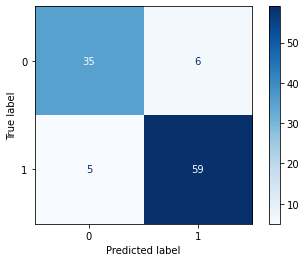

Sensitivity is 0.92. Specificity is 0.85. PPV is 0.91. NPV is 0.88. Accuracy is 0.90. F1 is 0.91. 
AUROC is 0.95


In [15]:
from Classifier import plot_evel
plot_evel(best_log_reg,X_test,Y_test)

In [19]:
from sklearn.metrics import hinge_loss
best_svm_nonlin.fit(X_train,Y_train)
y_pred_train = best_svm_nonlin.decision_function(X_train)
y_pred_test = best_svm_nonlin.decision_function(X_test)
print("train loss is {:.2f}".format(hinge_loss(Y_train,y_pred_train)))
print("test loss is {:.2f}".format(hinge_loss(Y_test,y_pred_test)))

train loss is 0.13
test loss is 0.19


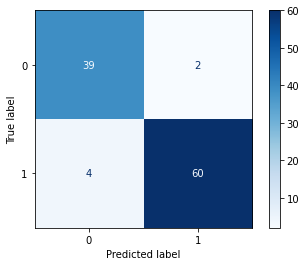

Sensitivity is 0.94. Specificity is 0.95. PPV is 0.97. NPV is 0.91. Accuracy is 0.94. F1 is 0.95. 
AUROC is 0.99


In [20]:
plot_evel(best_svm_nonlin,X_test,Y_test)

5.c the non-linear model preformed better.....

# sec 6

In [25]:
from sklearn.ensemble import RandomForestClassifier as rfc
import matplotlib
#Load boston housing dataset as an example
names = list(X_train.columns)
clf = rfc(n_estimators=10)
clf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=10)

[Text(0, 0, 'Age'),
 Text(1, 0, 'Gender_Female'),
 Text(2, 0, 'Gender_Male'),
 Text(3, 0, 'Increased Urination_No'),
 Text(4, 0, 'Increased Urination_Yes'),
 Text(5, 0, 'Increased Thirst_No'),
 Text(6, 0, 'Increased Thirst_Yes'),
 Text(7, 0, 'Sudden Weight Loss_No'),
 Text(8, 0, 'Sudden Weight Loss_Yes'),
 Text(9, 0, 'Weakness_No'),
 Text(10, 0, 'Weakness_Yes'),
 Text(11, 0, 'Increased Hunger_No'),
 Text(12, 0, 'Increased Hunger_Yes'),
 Text(13, 0, 'Genital Thrush_No'),
 Text(14, 0, 'Genital Thrush_Yes'),
 Text(15, 0, 'Visual Blurring_No'),
 Text(16, 0, 'Visual Blurring_Yes'),
 Text(17, 0, 'Itching_No'),
 Text(18, 0, 'Itching_Yes'),
 Text(19, 0, 'Irritability_No'),
 Text(20, 0, 'Irritability_Yes'),
 Text(21, 0, 'Delayed Healing_No'),
 Text(22, 0, 'Delayed Healing_Yes'),
 Text(23, 0, 'Partial Paresis_No'),
 Text(24, 0, 'Partial Paresis_Yes'),
 Text(25, 0, 'Muscle Stiffness_No'),
 Text(26, 0, 'Muscle Stiffness_Yes'),
 Text(27, 0, 'Hair Loss_No'),
 Text(28, 0, 'Hair Loss_Yes'),
 Text(29, 

<Figure size 1008x720 with 0 Axes>

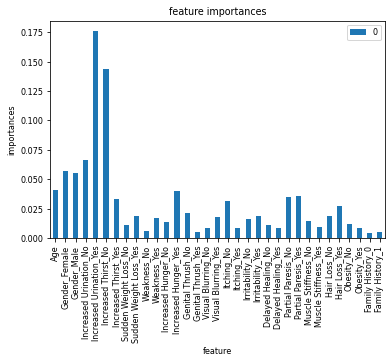

In [26]:
plt.figure(figsize=(14, 10))
matplotlib.rcParams.update({'font.size': 8})
feature_importances = pd.DataFrame(clf.feature_importances_)

ax = feature_importances.plot(kind='bar')
ax.set_title('feature importances')
ax.set_xlabel('feature')
ax.set_ylabel('importances')
ax.set_xticklabels(names)

6.a.1 the most importent features are increased thirst and increased urination...

6.a.2...

# sec 7

a. dimensionality reduction with PCA 

In [28]:
from sklearn.decomposition import PCA
n_components = 2
pca = PCA(n_components=n_components, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [29]:
def plt_2d_pca(X_pca,y):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, aspect='equal')
    ax.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='b')
    ax.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='r')
    ax.legend(('B','M'))
    ax.plot([0], [0], "ko")
    ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.set_xlabel('$U_1$')
    ax.set_ylabel('$U_2$')
    ax.set_title('2D PCA')

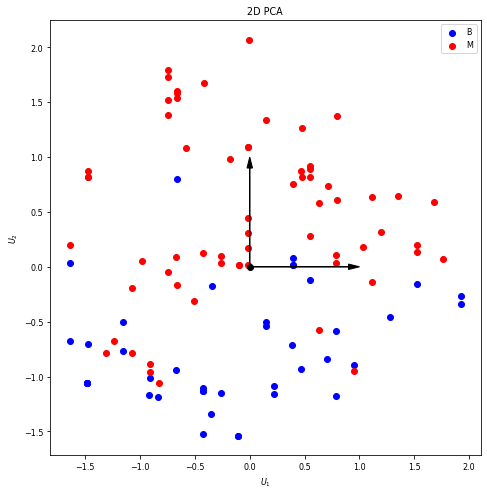

In [30]:
plt_2d_pca(X_test_pca,Y_test)

b. Overall we can distinguish between area were each label is more common. However there are areas where data separation is not so straightforward

C. trainig non linear svm and logistic regression with dimension reduced dataset 

In [31]:
pipe_pca = Pipeline(steps=[('scale', StandardScaler()),('pca', pca), ('logistic', best_log_reg)])
pipe_pca.fit(X_train, Y_train)
print('The score on the test set with PCA preprocessing is {:.2f}'.format(pipe_pca.score(X_test,Y_test)))

The score on the test set with PCA preprocessing is 0.79


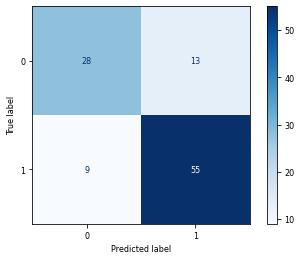

Sensitivity is 0.86. Specificity is 0.68. PPV is 0.81. NPV is 0.76. Accuracy is 0.79. F1 is 0.83. 
AUROC is 0.90


In [32]:
plot_evel(pipe_pca,X_test,Y_test)

In [33]:
pipe_pca_svm = Pipeline(steps=[('scale', StandardScaler()),('pca', pca), ('svm', best_svm_nonlin)])
pipe_pca_svm.fit(X_train, Y_train)
print('The score on the test set with PCA preprocessing is {:.2f}'.format(pipe_pca_svm.score(X_test,Y_test)))

The score on the test set with PCA preprocessing is 0.83


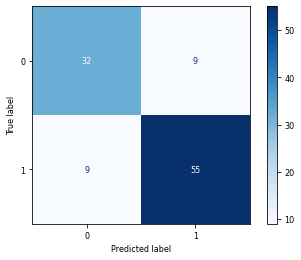

Sensitivity is 0.86. Specificity is 0.78. PPV is 0.86. NPV is 0.78. Accuracy is 0.83. F1 is 0.86. 
AUROC is 0.93


In [34]:
plot_evel(pipe_pca_svm,X_test,Y_test)

d. trainig non linear svm and logistic regression on reduced data set wich include only the two most importent feat as was calculted in sec 6

In [35]:
cols =['Increased Thirst_Yes', 'Increased Urination_Yes']
X_train_two_feat = X_train[cols]
X_test_two_feat = X_test[cols]

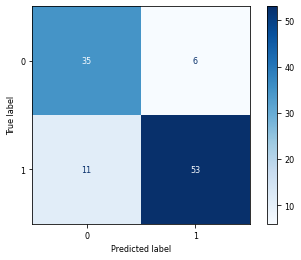

Sensitivity is 0.83. Specificity is 0.85. PPV is 0.90. NPV is 0.76. Accuracy is 0.84. F1 is 0.86. 
AUROC is 0.88


In [36]:
best_log_reg.fit(X_train_two_feat,Y_train)
plot_evel(best_log_reg,X_test_two_feat,Y_test)

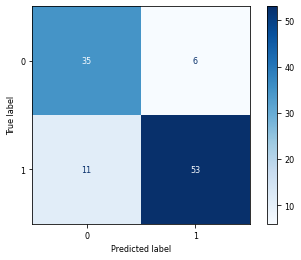

Sensitivity is 0.83. Specificity is 0.85. PPV is 0.90. NPV is 0.76. Accuracy is 0.84. F1 is 0.86. 
AUROC is 0.88


In [100]:
best_svm_nonlin.fit(X_train_two_feat,Y_train)
plot_evel(best_svm_nonlin,X_test_two_feat,Y_test)

e. 2 feat preform better with the logistic regression model. the non-linear svm model preformem the same on the 2 feat and on the dimension reduced dataset